<a href="https://colab.research.google.com/github/MaxKuzaj13/dw_matrix_road_sign/blob/master/matrix_3_day_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pwd

'/content'

In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import datetime
import os


#%load_ext tensorboard
import matplotlib.pyplot as plt
from skimage import color,exposure
from sklearn.metrics import accuracy_score

In [3]:
cd '/content/drive/My Drive/Colab Notebooks/matrix/matrix_three'

/content/drive/My Drive/Colab Notebooks/matrix/matrix_three


In [0]:
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
df = pd.read_csv('data/signnames.csv')
labels_dict =df.to_dict()['b']

In [79]:
y_pred_prob[400]

array([5.5010236e-09, 9.9999988e-01, 7.7017131e-15, 2.1831603e-14,
       8.9423921e-08, 1.9332235e-12, 1.7959863e-18, 6.8035010e-17,
       1.1709584e-28, 9.4832009e-17, 1.3464366e-24, 2.0543618e-18,
       4.8738494e-32, 1.5696905e-29, 3.9613937e-27, 8.6476689e-33,
       5.2402204e-24, 1.0855983e-28, 7.9269707e-14, 2.5354436e-33,
       1.9531131e-25, 3.8969095e-22, 1.9327508e-35, 5.6921497e-26,
       5.9337026e-20, 4.1454715e-29, 7.8557748e-22, 1.6817528e-37,
       1.9377528e-16, 1.3576865e-15, 1.9380026e-25, 1.1921103e-20,
       0.0000000e+00, 7.7992885e-35, 5.2391290e-36, 9.9048457e-26,
       0.0000000e+00, 0.0000000e+00, 6.8178755e-30, 0.0000000e+00,
       6.7156304e-38, 1.8553990e-36, 1.9622348e-29], dtype=float32)

In [0]:
if y_train.ndim ==1: y_train = to_categorical(y_train)
if y_test.ndim ==1: y_test = to_categorical(y_test)


In [0]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [0]:
def get_cnn_v1(input_shape, num_classes):
  return  Sequential([
                  Conv2D(filters=65, kernel_size=(3,3), activation='relu',input_shape=input_shape),
                  Flatten(),
                  Dense(num_classes, activation='softmax'),
])


def train_model(model, X_train, y_train, params_fit={}):
  model.compile(loss = 'categorical_crossentropy', optimizer= 'Adam', metrics=['accuracy'])

  logdir=os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

  model.fit(
      X_train, 
      y_train,
      batch_size = params_fit.get('batch_size', 128),
      epochs = params_fit.get('epochs', 5),
      verbose = params_fit.get('verbose', 1),
      validation_data = params_fit.get('validation_data', (X_train, y_train)),
      callbacks = [tensorboard_callback]
  )
  return model 

In [80]:
model  = get_cnn_v1(input_shape, num_classes)
model_trained = train_model(model, X_train, y_train)

Epoch 1/5
272/272 [==============================] - 3s 10ms/step - loss: 53.5653 - accuracy: 0.7011 - val_loss: 0.2833 - val_accuracy: 0.9341
Epoch 2/5
272/272 [==============================] - 3s 9ms/step - loss: 0.2631 - accuracy: 0.9405 - val_loss: 0.1487 - val_accuracy: 0.9612
Epoch 3/5
272/272 [==============================] - 3s 9ms/step - loss: 0.1358 - accuracy: 0.9670 - val_loss: 0.0874 - val_accuracy: 0.9783
Epoch 4/5
272/272 [==============================] - 2s 9ms/step - loss: 0.1145 - accuracy: 0.9732 - val_loss: 0.0768 - val_accuracy: 0.9830
Epoch 5/5
272/272 [==============================] - 2s 9ms/step - loss: 0.1212 - accuracy: 0.9740 - val_loss: 0.0948 - val_accuracy: 0.9760


In [0]:
def predict(model_trained, X_test, y_test, scoring = accuracy_score):
  y_test_norm = np.argmax(y_test, axis=1)
  y_pred_prob = model_trained.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis=1)
  
  return scoring(y_test_norm, y_pred)

In [82]:
predict(model_trained, X_test, y_test)

0.8108843537414966

In [0]:
def training_and_predict(model):
  model_trained = train_model(model, X_train, y_train)
  return predict(model_trained, X_test, y_test)

In [86]:
def get_cnn_v2(input_shape, num_classes):
  return  Sequential([
                  Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=input_shape),
                  MaxPool2D(),
                  Dropout(0.3),

                  Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                  MaxPool2D(),
                  Dropout(0.3),

                  Flatten(),
                  Dense(1024, activation= 'relu'),
                  Dropout(0.3),

                  Dense(num_classes, activation='softmax'),
])


training_and_predict(get_cnn_v2(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 3s 9ms/step - loss: 3.8728 - accuracy: 0.4445 - val_loss: 0.5101 - val_accuracy: 0.8734
Epoch 2/5
272/272 [==============================] - 2s 9ms/step - loss: 0.6405 - accuracy: 0.8126 - val_loss: 0.2039 - val_accuracy: 0.9613
Epoch 3/5
272/272 [==============================] - 2s 9ms/step - loss: 0.3813 - accuracy: 0.8884 - val_loss: 0.1056 - val_accuracy: 0.9784
Epoch 4/5
272/272 [==============================] - 2s 9ms/step - loss: 0.2894 - accuracy: 0.9152 - val_loss: 0.0607 - val_accuracy: 0.9896
Epoch 5/5
272/272 [==============================] - 2s 9ms/step - loss: 0.2259 - accuracy: 0.9342 - val_loss: 0.0511 - val_accuracy: 0.9916


0.9138321995464853

In [88]:
def get_cnn_v3(input_shape, num_classes):
  return  Sequential([
                  Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=input_shape),
                  Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
                  MaxPool2D(),
                  Dropout(0.3),

                  Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                  Conv2D(filters=64, kernel_size=(3,3), activation='relu'),

                  MaxPool2D(),
                  Dropout(0.3),

                  Flatten(),
                  Dense(1024, activation= 'relu'),
                  Dropout(0.3),

                  Dense(num_classes, activation='softmax'),
])


training_and_predict(get_cnn_v3(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 3s 12ms/step - loss: 2.2189 - accuracy: 0.5260 - val_loss: 0.3182 - val_accuracy: 0.9358
Epoch 2/5
272/272 [==============================] - 3s 11ms/step - loss: 0.4699 - accuracy: 0.8659 - val_loss: 0.0916 - val_accuracy: 0.9792
Epoch 3/5
272/272 [==============================] - 3s 11ms/step - loss: 0.2487 - accuracy: 0.9297 - val_loss: 0.0467 - val_accuracy: 0.9901
Epoch 4/5
272/272 [==============================] - 3s 11ms/step - loss: 0.1719 - accuracy: 0.9495 - val_loss: 0.0291 - val_accuracy: 0.9938
Epoch 5/5
272/272 [==============================] - 3s 11ms/step - loss: 0.1238 - accuracy: 0.9635 - val_loss: 0.0215 - val_accuracy: 0.9955


0.9723356009070295

In [93]:
def get_cnn_v4(input_shape, num_classes):
  return  Sequential([
                  Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
                  Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
                  MaxPool2D(),
                  Dropout(0.3),

                  Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
                  Conv2D(filters=64, kernel_size=(3,3), activation='relu'),

                  MaxPool2D(),
                  Dropout(0.3),
                  Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
                  Conv2D(filters=64, kernel_size=(3,3), activation='relu'),

                  MaxPool2D(),
                  Dropout(0.3),

                  Flatten(),
                  Dense(1024, activation= 'relu'),
                  Dropout(0.3),

                  Dense(num_classes, activation='softmax'),
])

#get_cnn_v4(input_shape, num_classes).summary()
training_and_predict(get_cnn_v4(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 4s 13ms/step - loss: 2.2123 - accuracy: 0.4014 - val_loss: 0.4858 - val_accuracy: 0.8618
Epoch 2/5
272/272 [==============================] - 3s 12ms/step - loss: 0.5712 - accuracy: 0.8268 - val_loss: 0.1089 - val_accuracy: 0.9701
Epoch 3/5
272/272 [==============================] - 3s 13ms/step - loss: 0.2876 - accuracy: 0.9154 - val_loss: 0.0527 - val_accuracy: 0.9845
Epoch 4/5
272/272 [==============================] - 3s 13ms/step - loss: 0.1863 - accuracy: 0.9451 - val_loss: 0.0330 - val_accuracy: 0.9904
Epoch 5/5
272/272 [==============================] - 3s 12ms/step - loss: 0.1553 - accuracy: 0.9534 - val_loss: 0.0268 - val_accuracy: 0.9920


0.9684807256235828

In [94]:
def get_cnn_v5(input_shape, num_classes):
  return  Sequential([
                  Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
                  Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
                  MaxPool2D(),
                  Dropout(0.3),

                  Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
                  Conv2D(filters=64, kernel_size=(3,3), activation='relu'),

                  MaxPool2D(),
                  Dropout(0.3),
                  Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
                  Conv2D(filters=64, kernel_size=(3,3), activation='relu'),

                  MaxPool2D(),
                  Dropout(0.3),

                  Flatten(),
                  Dense(1024, activation= 'relu'),
                  Dropout(0.3),
                  Dense(1024, activation= 'relu'),
                  Dropout(0.3),

                  Dense(num_classes, activation='softmax'),
])

#get_cnn_v4(input_shape, num_classes).summary()
training_and_predict(get_cnn_v5(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 2.7099 - accuracy: 0.2652 - val_loss: 1.0390 - val_accuracy: 0.6838
Epoch 2/5
272/272 [==============================] - 4s 13ms/step - loss: 0.8793 - accuracy: 0.7211 - val_loss: 0.2418 - val_accuracy: 0.9175
Epoch 3/5
272/272 [==============================] - 4s 13ms/step - loss: 0.3955 - accuracy: 0.8786 - val_loss: 0.1089 - val_accuracy: 0.9690
Epoch 4/5
272/272 [==============================] - 4s 13ms/step - loss: 0.2590 - accuracy: 0.9226 - val_loss: 0.0589 - val_accuracy: 0.9845
Epoch 5/5
272/272 [==============================] - 4s 13ms/step - loss: 0.1926 - accuracy: 0.9435 - val_loss: 0.0345 - val_accuracy: 0.9905


0.9739229024943311

In [95]:
X_train[0].shape

(32, 32, 3)

In [97]:
X_train
color.rgb2gray(X_train[0]).shape

(32, 32)

In [0]:
X_train_gray = color.rgb2gray(X_train).reshape(-1, 32, 32, 1)
X_test_gray = color.rgb2gray(X_test).reshape(-1, 32, 32, 1)

In [0]:
#X_train_gray.reshape(-1, 32, 32, 1).shape

In [112]:
model = get_cnn_v5((32,32,1), num_classes)
model_trained = train_model(model, X_train_gray, y_train, params_fit={})
predict(model_trained, X_test_gray, y_test)

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 2.3611 - accuracy: 0.3187 - val_loss: 0.5408 - val_accuracy: 0.8328
Epoch 2/5
272/272 [==============================] - 4s 13ms/step - loss: 0.4637 - accuracy: 0.8483 - val_loss: 0.1281 - val_accuracy: 0.9605
Epoch 3/5
272/272 [==============================] - 4s 13ms/step - loss: 0.2180 - accuracy: 0.9296 - val_loss: 0.0753 - val_accuracy: 0.9789
Epoch 4/5
272/272 [==============================] - 4s 13ms/step - loss: 0.1468 - accuracy: 0.9526 - val_loss: 0.0402 - val_accuracy: 0.9886
Epoch 5/5
272/272 [==============================] - 4s 13ms/step - loss: 0.1067 - accuracy: 0.9659 - val_loss: 0.0229 - val_accuracy: 0.9940


0.9671201814058957

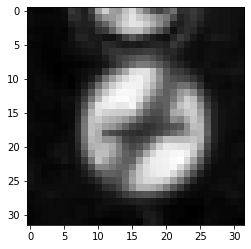

In [111]:
plt.imshow(color.rgb2gray(X_train[0]), cmap=plt.get_cmap('gray'))

In [0]:
##JESCZE NAQ FILMIE BYLO WIECEJ

In [18]:
y_pred_prob[400]

array([5.5010236e-09, 9.9999988e-01, 7.7017131e-15, 2.1831603e-14,
       8.9423921e-08, 1.9332235e-12, 1.7959863e-18, 6.8035010e-17,
       1.1709584e-28, 9.4832009e-17, 1.3464366e-24, 2.0543618e-18,
       4.8738494e-32, 1.5696905e-29, 3.9613937e-27, 8.6476689e-33,
       5.2402204e-24, 1.0855983e-28, 7.9269707e-14, 2.5354436e-33,
       1.9531131e-25, 3.8969095e-22, 1.9327508e-35, 5.6921497e-26,
       5.9337026e-20, 4.1454715e-29, 7.8557748e-22, 1.6817528e-37,
       1.9377528e-16, 1.3576865e-15, 1.9380026e-25, 1.1921103e-20,
       0.0000000e+00, 7.7992885e-35, 5.2391290e-36, 9.9048457e-26,
       0.0000000e+00, 0.0000000e+00, 6.8178755e-30, 0.0000000e+00,
       6.7156304e-38, 1.8553990e-36, 1.9622348e-29], dtype=float32)

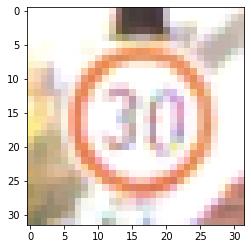

In [17]:
plt.imshow(X_test[400])

In [19]:
labels_dict[np.argmax(y_pred_prob[400])]

'Speed limit (30km/h)'